In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import time

import os

root = './dataset'
t_path = ['dataset_479911147.csv',
          'dataset_665254893.csv',
          'dataset_1095394822.csv',
          'dataset_1790789260.csv',]

s_path = ['dataset_1992961554.csv',
          'dataset_852552682.csv',
          'dataset_401881001.csv',
          'dataset_320725673.csv',]

l_path = ['dataset_1999618571.csv',
          'dataset_395223984.csv',
          'dataset_327382690.csv',]

# Outliers

An outlier is a data point that is very different from most of the remaining data.
Hawkins formally defined the notion of an outlier as follows
> An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism.

One of the most common method used to found outliers is the Tukey Fence.
This method is based on the interquartile range (IQR):

if $Q_1$ and $Q_3$ are the lower and upper quartile, an outlier is any observation outside the range:

<center> $[ Q_1 - 1.5(Q_3 - Q_1), Q_3+1.5(Q_3-Q_1) ]$ </center>

In [2]:
def tukey_fence(sequence):
    Q = np.quantile(sequence, [.25,.75])
    Q1 = Q[0]
    Q3 = Q[1]
    IQR = Q3-Q1
    QL = Q1 - 1.5*IQR
    QH = Q3 + 1.5*IQR
    
    return [x for x in sequence if (x < QL or x > QH)]

## Values Outliers
Try to count the number of outliers on measured data

In [3]:
for path in t_path+s_path+l_path:
    path = os.path.join(root, path)
    df = pd.read_csv(path, header=None)
    
    st = df.iloc[0,0].split('/')[-1]
    room = df.iloc[0,0].split('/')[-2]
    
    ts = df.iloc[:,1]
    val = df.iloc[:,2]
    
    outliers = tukey_fence(val)
    print(room, st, len(outliers))
    


0xd19 temp 389
0xd1a temp 0
0xfef temp 0
0x3bd temp 0
0xd19 sound 503
0xd1a sound 498
0xfef sound 480
0x3bd sound 4327
0xd19 light 0
0xfef light 647
0x3bd light 3622


For some sensors there are no outliers count, for other there are maybe too much outliers

|Node|Type|%outliers|
|---|---|---|
|d19|temp|1.95|
|d19|sound|2.55|
|d19|light|0|
|fef|temp|0|
|fef|sound|2.4|
|fef|light|3.24|
|3bd|temp|0|
|3bd|sound|21.64|
|3bd|light|18.11|
|d1a|temp|0|
|d1a|sound|2.49|


In [4]:
#s_path[]
#l_path[]
#t_path[]

## Time sequence outliers

Considering how many measurements are outliers, in the sense that the time between two measurements is too high or to low wrt the distribution.

One problem is given by the granularity of the timestams, it is in ms. A lot of more values will be considered outliers, also wen close to 10s, so the values are rounded to the closest second

In [5]:
def time_shift(df):
    ts = df.iloc[:,1]

    ts1 = ts[1:].values - ts[0:-1].values
    ts1 = np.concatenate([[0], ts1])
    ts1 = ts1/1000
    ts1 = ts1.round()
    
    ret = df.copy()
    ret[3] = ts1
    
    return ret

In [6]:
%matplotlib inline

for path in t_path+s_path+l_path:
    path = os.path.join(root, path)
    df = pd.read_csv(path, header=None)
    df = time_shift(df)
    
    st = df.iloc[0,0].split('/')[-1]
    room = df.iloc[0,0].split('/')[-2]
    
    ts = df.iloc[:,3]
    
    outliers = tukey_fence(ts)
    
    st = df.iloc[0,0].split('/')[-1]
    room = df.iloc[0,0].split('/')[-2]
    
    print(room, st,len(outliers))

0xd19 temp 1475
0xd1a temp 1346
0xfef temp 1360
0x3bd temp 3616
0xd19 sound 1477
0xd1a sound 1345
0xfef sound 1358
0x3bd sound 3615
0xd19 light 1477
0xfef light 1362
0x3bd light 3613


All outliers are the datapoints that are not within 10s

|Node|Type|%outliers|
|---|---|---|
|d19|temp|7.36|
|d19|sound|7.39|
|d19|light|7.39|
|fef|temp|6.8|
|fef|sound|6.79|
|fef|light|6.81|
|3bd|temp|18.08|
|3bd|sound|18.08|
|3bd|light|18.07|
|d1a|temp|6.73|
|d1a|sound|6.73|



<IPython.core.display.Javascript object>


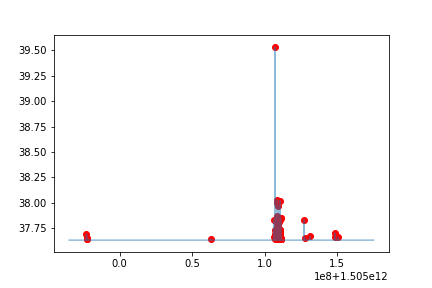

In [7]:
%matplotlib notebook
to_plot = s_path[0]
x = pd.read_csv(os.path.join(root,to_plot), header=None)
x = x.iloc[0:19500,1:3]

X = x.iloc[:,0]
#X = X*1000000 #reach correct granularity for numpy
#X = X.astype('datetime64')

#xfmt = mdates.DateFormatter('%b %d')

Y = x.iloc[:,1]

fig, ax = plt.subplots()

#ax.plot(X, Y, 'o-')
#ax.xaxis.set_major_formatter(xfmt)

plt.plot(X,Y, '-', alpha = 0.5)

xQ = np.quantile( X , [.25,.75])
xIQR = xQ[1]-xQ[0]
xL = xQ[0]-1.5*xIQR
xH = xQ[1]+1.5*xIQR

yQ = np.quantile( Y , [.25,.75])
yIQR = yQ[1]-yQ[0]
yL = yQ[0]-1.5*yIQR
yH = yQ[1]+1.5*yIQR

for x, y in zip(X,Y):
    if yH < y or y < yL:
        plt.scatter(x,y, c='r')
plt.show()